# COMP30760 - Assignment 2 - Rónan O'Neill - 16433656
## Data Parsing & Time Series
The three stocks that I have chosen to analyse for this assignment are: [Activision Blizzard Inc.](http://mlg.ucd.ie/modules/COMP30760/stocks/atvi.html), [Microsoft Corporation](http://mlg.ucd.ie/modules/COMP30760/stocks/msft.html), and [Netflix](http://mlg.ucd.ie/modules/COMP30760/stocks/nflx.html).

## 1. Data Collection
Similar to my method in the previous assingment, the link to the HTML page for each company is stored in a string. Then using the "urlretrieve" function from the "urllib" library, the files are downloaded and stored in the same directory as the notebook. They are each named after their respective stock market abbreviations.

In [1]:
# Activision Blizzard, Inc.
atviURL = "http://mlg.ucd.ie/modules/COMP30760/stocks/atvi.html"

# Microsoft Corporation
msftURL = "http://mlg.ucd.ie/modules/COMP30760/stocks/msft.html"

# Netflix
nflxURL = "http://mlg.ucd.ie/modules/COMP30760/stocks/nflx.html"

import urllib
# Download file to directory containing notebook
ATVI_Response = urllib.request.urlretrieve (atviURL, "ATVI.html")
MSFT_Response = urllib.request.urlretrieve (msftURL, "MSFT.html")
NFLX_Response = urllib.request.urlretrieve (nflxURL, "NFLX.html")

## 2. Parsing and Preprocessing
To parse the data, BeautifulSoup is used to scrape the tables from each HTML. All tables are found within each HTML and are appended to a list using a for loop.

Each element in the list, which represents data for a certain year, is then concatenated into a DataFrame for each stock.

In the original HTML pages, each stock had missing days. For this reason I felt it acceptable to completely drop rows that contained missing values, instead of imputing the missing data.

The column containing the name of the stock is also dropped as it is redundant.

A sample of each stock is then printed.

In [2]:
import pandas as pd
from bs4 import BeautifulSoup

# Use BeautifulSoup to scrape HTML
soup = BeautifulSoup(open("ATVI.html"), "html.parser")
tables = soup.findAll('table')
tablesATVI = list()

# Add all tables to list
for table in tables:
    df = pd.read_html(str(table))[0]
    tablesATVI.append(df)

# Add data for each year to one DataFrame
byYearATVI = [tablesATVI[0], tablesATVI[1], tablesATVI[2], tablesATVI[3], tablesATVI[4], tablesATVI[5], tablesATVI[6]]
dfATVI = pd.concat(byYearATVI)

# Drop rows that contain NaN values
dfATVI = dfATVI[pd.notnull(dfATVI["Open"])]
dfATVI = dfATVI[pd.notnull(dfATVI["High"])]
dfATVI = dfATVI[pd.notnull(dfATVI["Low"])]
dfATVI = dfATVI[pd.notnull(dfATVI["Close"])]

# Drop redundant Stock column
dfATVI.drop("Stock", axis=1, inplace=True)

# Print sample
dfATVI.sample(5)

,Year,Month,Day,Open,High,Low,Close
87,2017,5,9,53.939999,54.790001,53.759998,54.619999
85,2014,5,6,19.440001,19.490000,19.120001,19.309999
124,2017,6,30,57.930000,58.119999,57.169998,57.570000
3,2013,1,7,11.150000,11.250000,11.050000,11.180000
179,2013,9,18,17.080000,17.219999,16.900000,17.150000


In [3]:
# Use BeautifulSoup to scrape HTML
soup = BeautifulSoup(open("MSFT.html"), "html.parser")
tables = soup.findAll('table')
tablesMSFT = list()

# Add all tables to list
for table in tables:
    df = pd.read_html(str(table))[0]
    tablesMSFT.append(df)

# Add data for each year to one DataFrame    
byYearMSFT = [tablesMSFT[0], tablesMSFT[1], tablesMSFT[2], tablesMSFT[3], tablesMSFT[4], tablesMSFT[5], tablesMSFT[6]]
dfMSFT = pd.concat(byYearMSFT)

# Drop rows that contain NaN values
dfMSFT = dfMSFT[pd.notnull(dfMSFT["Open"])]
dfMSFT = dfMSFT[pd.notnull(dfMSFT["High"])]
dfMSFT = dfMSFT[pd.notnull(dfMSFT["Low"])]
dfMSFT = dfMSFT[pd.notnull(dfMSFT["Close"])]

# Drop redundant Stock column
dfMSFT.drop("Stock", axis=1, inplace=True)

# Print sample
dfMSFT.sample(5)

,Year,Month,Day,Open,High,Low,Close
241,2013,12,16,36.730000,37.000000,36.540001,36.889999
176,2014,9,15,46.540001,46.709999,46.099998,46.240002
225,2015,11,23,54.250000,54.459999,53.750000,54.189999
185,2013,9,26,32.639999,33.000000,32.590000,32.770000
204,2018,10,23,107.769997,108.970001,105.110001,108.099998


In [4]:
# Use BeautifulSoup to scrape HTML
soup = BeautifulSoup(open("NFLX.html"), "html.parser")
tables = soup.findAll('table')
tablesNFLX = list()

# Add all tables to list
for table in tables:
    df = pd.read_html(str(table))[0]
    tablesNFLX.append(df)
    
# Add data for each year to one DataFrame    
byYearNFLX = [tablesNFLX[0], tablesNFLX[1], tablesNFLX[2], tablesNFLX[3], tablesNFLX[4], tablesNFLX[5], tablesNFLX[6]]
dfNFLX = pd.concat(byYearNFLX)

# Drop rows that contain NaN values
dfNFLX = dfNFLX[pd.notnull(dfNFLX["Open"])]
dfNFLX = dfNFLX[pd.notnull(dfNFLX["High"])]
dfNFLX = dfNFLX[pd.notnull(dfNFLX["Low"])]
dfNFLX = dfNFLX[pd.notnull(dfNFLX["Close"])]

# Drop redundant Stock column
dfNFLX.drop("Stock", axis=1, inplace=True)

# Print sample
dfNFLX.sample(5)

,Day,Month,Year,Open,High,Low,Close
95,19,May,2016,90.160004,91.269997,88.300003,89.550003
199,16,October,2013,45.730000,46.500000,45.465714,46.125713
54,22,March,2017,142.539993,143.800003,140.759995,142.649994
62,3,April,2018,285.450012,291.250000,278.010010,283.670013
187,30,September,2014,64.614288,65.312859,64.257141,64.454285


To represent the data as time series, the index of each DataFrame must be in DateTime form. To do this I used two methods; one for ATVI and MSFT and one for NFLX. The month data for both ATVI and MSFT was in the form of a two digit integer. This allowed for me to create a new column "DateTime" in each DataFrame that combined the "Day", "Month", and "Year" columns, seperated by a hyphen. These three columns were then dropped. The data in the DateTime column was then converted into DateTime format and this column was set as the index.

The month data for NFLX however was in long string form, so I used a different method to combine the columns. First, the "Year" and "Day" columns were converted to string types. Next, using the pop function I created the DateTime column with three strings, again seperated by hyphens. The use of the pop function also drops these columns from the DataFrame. When converting this column to DateTime format, %B is used tfor the month, as this represents long string format. This column was then used to set the index.

A sample of each DataFrame is again printed.

In [5]:
from datetime import datetime

# Join Day, Month, Year columns as DateTime
dfATVI["DateTime"] = dfATVI[dfATVI.columns[0:3]].apply(
    lambda x: "-".join(x.dropna().astype(int).astype(str)),
    axis=1
)

# Drop Day, Month, Year columns
dfATVI = dfATVI.drop("Year", 1)
dfATVI = dfATVI.drop("Month", 1)
dfATVI = dfATVI.drop("Day", 1)

# Convert DateTime to DateTime data type
dfATVI["DateTime"] =  pd.to_datetime(dfATVI["DateTime"], format="%Y-%m-%d")

# Set DateTime as index
dfATVI.set_index("DateTime", inplace=True)

# Print sample
dfATVI.sample(5)

,Open,High,Low,Close
DateTime,,,,
2016-03-16,32.490002,32.910000,32.200001,32.790001
2017-07-07,56.750000,58.360001,56.610001,58.090000
2015-05-18,25.360001,25.620001,25.290001,25.420000
2012-01-17,12.370000,12.380000,11.960000,11.990000
2017-02-03,40.709999,40.730000,39.900002,40.009998


In [6]:
# Join Day, Month, Year columns as DateTime
dfMSFT["DateTime"] = dfMSFT[dfMSFT.columns[0:3]].apply(
    lambda x: "-".join(x.dropna().astype(int).astype(str)),
    axis=1
)

# Drop Day, Month, Year columns
dfMSFT = dfMSFT.drop("Year", 1)
dfMSFT = dfMSFT.drop("Month", 1)
dfMSFT = dfMSFT.drop("Day", 1)

# Convert DateTime to DateTime data type
dfMSFT["DateTime"] =  pd.to_datetime(dfMSFT["DateTime"], format="%Y-%m-%d")

# Set DateTime as index
dfMSFT.set_index("DateTime", inplace=True)

# Print sample
dfMSFT.sample(5)

,Open,High,Low,Close
DateTime,,,,
2017-03-27,64.629997,65.220001,64.349998,65.099998
2014-01-09,35.880001,35.910000,35.400002,35.529999
2012-09-27,30.170000,30.400000,29.889999,30.160000
2018-05-23,96.709999,98.730003,96.320000,98.660004
2013-08-29,32.930000,33.599998,32.799999,33.549999


In [7]:
# Convert Day and Year columns to string type
dfNFLX["Day"] = dfNFLX["Day"].astype(str)
dfNFLX["Year"] = dfNFLX["Year"].astype(str)

# Join Day, Month, Year columns as DateTime, also dropping them
dfNFLX["DateTime"] = dfNFLX.pop("Year") + "-" + dfNFLX.pop("Month")  + "-" + dfNFLX.pop("Day")

# Convert DateTime to DateTime data type
dfNFLX["DateTime"] =  pd.to_datetime(dfNFLX["DateTime"], format="%Y-%B-%d")

# Set DateTime as index
dfNFLX.set_index("DateTime", inplace=True)

# Print sample
dfNFLX.sample(5)

,Open,High,Low,Close
DateTime,,,,
2017-04-06,144.000000,144.139999,143.009995,143.740005
2013-09-06,42.332859,42.358570,41.457142,41.648571
2017-05-30,163.600006,164.750000,162.710007,163.220001
2017-01-05,129.220001,132.750000,128.899994,131.809998
2012-04-27,12.244286,12.270000,11.857142,11.962857


For help in later analysis, two more DataFrames are created for each stock. These contain the yearly and monthly average for each stock.

A list of date names is created for use in labelling graphs.

Due to the fact that none of the DataFrames contains data for everyday in the 7 year span, different values are needed to calculate rolling monthy and yearly averages i.e. 365 cannot be used for rolling yearly average as there are not 7 * 365 entries in the DataFrames.

In [133]:
dfATVI_month = dfATVI.groupby(dfATVI.index.month).mean()
dfATVI_year = dfATVI.groupby(dfATVI.index.year).mean()

dfMSFT_month = dfMSFT.groupby(dfMSFT.index.month).mean()
dfMSFT_year = dfMSFT.groupby(dfMSFT.index.year).mean()

dfNFLX_month = dfNFLX.groupby(dfNFLX.index.month).mean()
dfNFLX_year = dfNFLX.groupby(dfNFLX.index.year).mean()

Month_List = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November",
              "December"]

ATVI_Count = dfATVI["Close"].count()
ATVI_Years = ATVI_Count//7
ATVI_Months = ATVI_Count//84

MSFT_Count = dfMSFT["Close"].count()
MSFT_Years  = MSFT_Count//7
MSFT_Months = MSFT_Count//84

NFLX_Count = dfNFLX["Close"].count()
NFLX_Years = NFLX_Count//7
NFLX_Months = NFLX_Count//84

## 3. Analysis and Interpretation
### Activision Blizzard Inc.

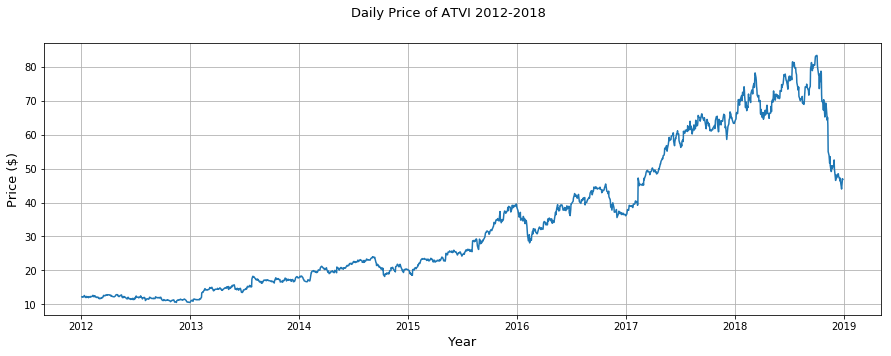

In [119]:
import matplotlib.pyplot as plt
import numpy as np

# Create figure
f = plt.figure(figsize=(15,5))

# Plot daily data
plt.plot(dfATVI["Close"])

# Add labels and titles
f.suptitle("Daily Price of ATVI 2012-2018", fontsize=13)
plt.xlabel("Year", fontsize=13)
plt.ylabel("Price ($)", fontsize=13)

# Add grid lines
plt.grid()

In [134]:
# Print head of ATVI DatFrame
dfATVI.head(5)

,Open,High,Low,Close
DateTime,,,,
2012-01-03,12.46,12.49,12.19,12.20
2012-01-04,12.21,12.27,12.07,12.11
2012-01-05,12.12,12.21,11.94,12.11
2012-01-06,12.09,12.31,11.98,12.24
2012-01-09,12.23,12.24,12.03,12.20


In [135]:
# Print tail of ATVI DataFrame
dfATVI.tail(5)

,Open,High,Low,Close
DateTime,,,,
2018-12-20,46.180000,47.730000,45.930000,47.049999
2018-12-21,47.619999,47.959999,44.959999,45.849998
2018-12-24,45.349998,46.290001,43.919998,43.990002
2018-12-27,45.709999,47.060001,45.209999,47.040001
2018-12-28,47.320000,47.590000,46.099998,46.799999


The daily analyis shows how the price of ATVI increased nearly 8 fold from the start of 2012 to mid 2018. We then see a sharp decline from there on, with the price almost halving by the beginning of 2019 and reducing to the price seen at the start of 2017. Other declines included the start and end of 2016, but these quickly recovered.

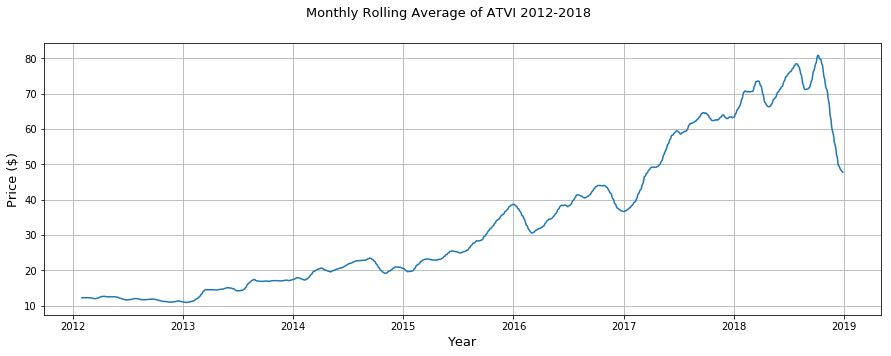

In [120]:
# Get monthly rolling mean
ATVI_rm1 = dfATVI["Close"].rolling(ATVI_Months).mean()

# Create figure
f = plt.figure(figsize=(15,5))

# Plot monthly rolling average
plt.plot(ATVI_rm1)

# Add labels and titles
f.suptitle("Monthly Rolling Average of ATVI 2012-2018", fontsize=13)
plt.xlabel("Year", fontsize=13)
plt.ylabel("Price ($)", fontsize=13)

# Add grid lines
plt.grid()

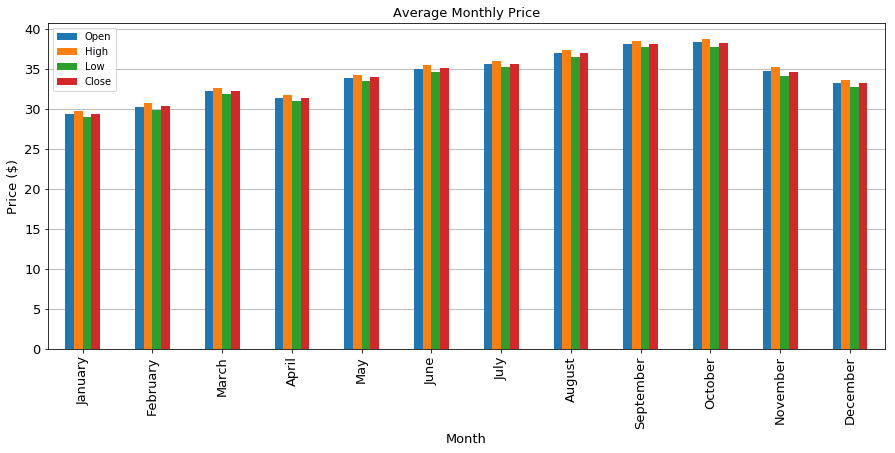

In [121]:
# Plot bar chart of monthly average 2012-2018
p = dfATVI_month.plot(kind="bar",figsize=(15, 6), fontsize=13, zorder=3)

# Add labels and titles
p.set_title("Average Monthly Price", fontsize=13)
p.set_xlabel("Month", fontsize=13)
p.set_xticklabels(Month_List)
p.set_ylabel("Price ($)", fontsize = 13)

# Add grid lines behind bars using zorder
p.grid(axis="y", zorder=0,)

In [138]:
# Print monthly average
dfATVI_month

,Open,High,Low,Close
DateTime,,,,
1,29.374851,29.709627,28.977388,29.388881
2,30.258771,30.743360,29.853279,30.351885
3,32.204744,32.567737,31.809416,32.225183
4,31.328214,31.649143,30.980143,31.316571
5,33.846294,34.258671,33.459510,33.900140
6,35.008897,35.392828,34.614621,35.027241
7,35.610145,35.998188,35.185797,35.628116
8,36.927075,37.329048,36.489660,36.918912
9,38.051349,38.462936,37.636429,38.081349


The monthly rolling average tells a similar story to the daily analysis. However, when we plot the monthly averages we can see that September and October are the best months for ATVI. The bar chart also tells us that the beginning of the year is usually a bad time, with January and February being the worst performing two months on average.

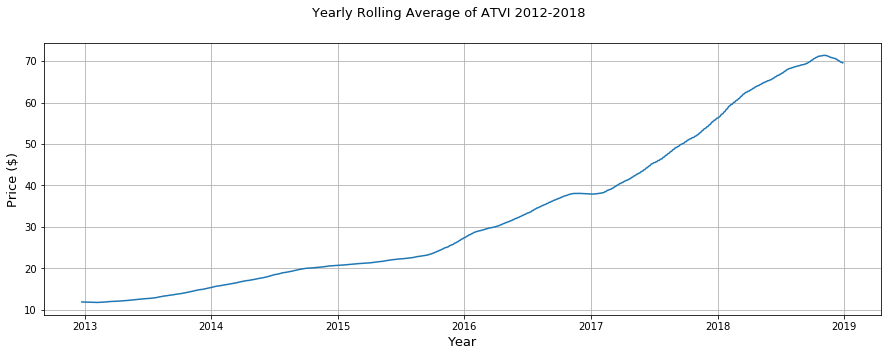

In [122]:
# Get yearly rolling average
ATVI_rm2 = dfATVI["Close"].rolling(ATVI_Years).mean()

# Create figure
f = plt.figure(figsize=(15,5))

# Plot monthly rolling average
plt.plot(ATVI_rm2)

# Add labels and titles
f.suptitle("Yearly Rolling Average of ATVI 2012-2018", fontsize=13)
plt.xlabel("Year", fontsize=13)
plt.ylabel("Price ($)", fontsize=13)

# Add grid lines
plt.grid()

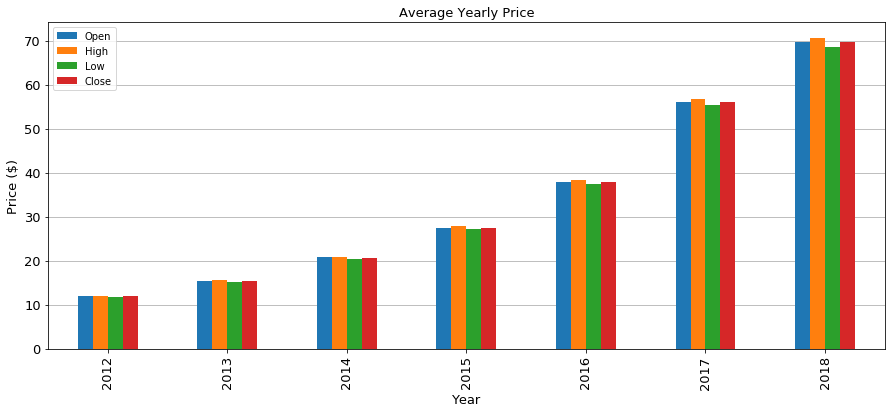

In [123]:
# Plot bar chart for yearly average 2012-2018
p = dfATVI_year.plot(kind="bar",figsize=(15, 6), fontsize=13, zorder=3)

# Add labels and titles
p.set_title("Average Yearly Price", fontsize=13)
p.set_xlabel("Year", fontsize=13)
p.set_ylabel("Price ($)", fontsize = 13)

# Add grid lines behind bars using zorder
p.grid(axis="y", zorder=0,)

In [139]:
# Print yearly average
dfATVI_year

,Open,High,Low,Close
DateTime,,,,
2012,11.869494,11.998776,11.729283,11.862489
2013,15.362414,15.550647,15.189353,15.379310
2014,20.698565,20.886540,20.442658,20.651941
2015,27.460437,27.798035,27.131572,27.499389
2016,37.947768,38.393133,37.452575,37.923605
2017,56.094103,56.657308,55.461538,56.128077
2018,69.637940,70.593176,68.598026,69.608970


We looking at the yearly rolling average, we lose almost all of the declines within the time frame. We see the peak in 2018 and only the beginning of the decline right before 2019. The only other period of non-positive growth is at the beginning of 2017, where we see a plateau in price.

The bar chart shows just how well the first half of 2018 peformed. Even including the massive dip at the end of the year, 2018 still had the highest average prices by some margin. We see steady growth year-on-year from 2012 to 2018, yet if you were to be presented with only this visualisation you would certainly be misled.

### Microsoft Corporation

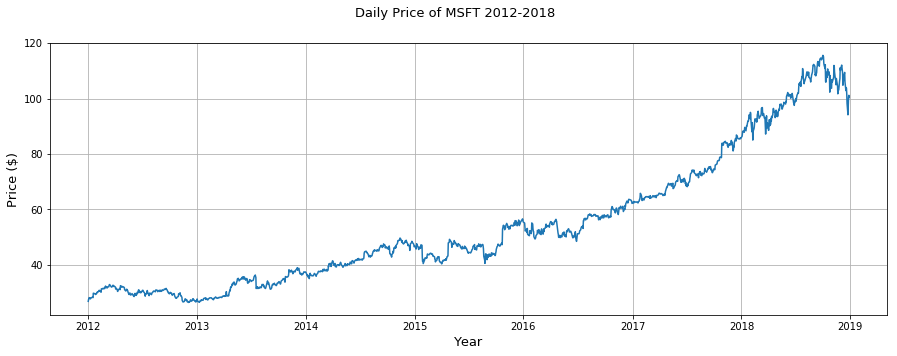

In [118]:
# Create figure
f = plt.figure(figsize=(15,5))

# Plot daily data
plt.plot(dfMSFT["Close"])

# Add labels and titles
f.suptitle("Daily Price of MSFT 2012-2018", fontsize=13)
plt.xlabel("Year", fontsize=13)
plt.ylabel("Price ($)", fontsize=13)

# Add grid lines
plt.grid()

In [140]:
# Print head of MSFT DataFrame
dfMSFT.head(5)

,Open,High,Low,Close
DateTime,,,,
2012-01-03,26.549999,26.959999,26.389999,26.770000
2012-01-04,26.820000,27.469999,26.780001,27.400000
2012-01-05,27.379999,27.730000,27.290001,27.680000
2012-01-06,27.530001,28.190001,27.530001,28.110001
2012-01-09,28.049999,28.100000,27.719999,27.740000


In [141]:
# Print tail of MSFT DataFrame
dfMSFT.tail(5)

,Open,High,Low,Close
DateTime,,,,
2018-12-21,101.629997,103.000000,97.459999,98.230003
2018-12-24,97.680000,97.970001,93.980003,94.129997
2018-12-26,95.139999,100.690002,93.959999,100.559998
2018-12-27,99.300003,101.190002,96.400002,101.180000
2018-12-28,102.089996,102.410004,99.519997,100.389999


The daily trends of MSFT share a lot of similarites to that of ATVI. Both grow exponentially from 2012 to 2018 and both show signs of decline in the second half of 2018. Yet MSFT shows signs of improvement just at the very end of 2019, with a relatively small, but definite increase. As with ATVI, 2018 is this stock's peak year, but also the year in which it suffers its greatest loss.

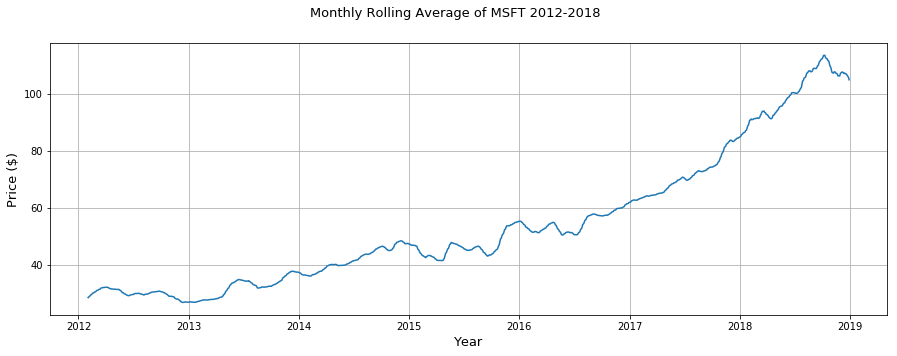

In [124]:
# Get monthly rolling mean
MSFT_rm1 = dfMSFT["Close"].rolling(MSFT_Months).mean()

# Create figure
f = plt.figure(figsize=(15,5))

# Plot monthly rolling average
plt.plot(MSFT_rm1)

# Add labels and titles
f.suptitle("Monthly Rolling Average of MSFT 2012-2018", fontsize=13)
plt.xlabel("Year", fontsize=13)
plt.ylabel("Price ($)", fontsize=13)

# Add grid lines
plt.grid()

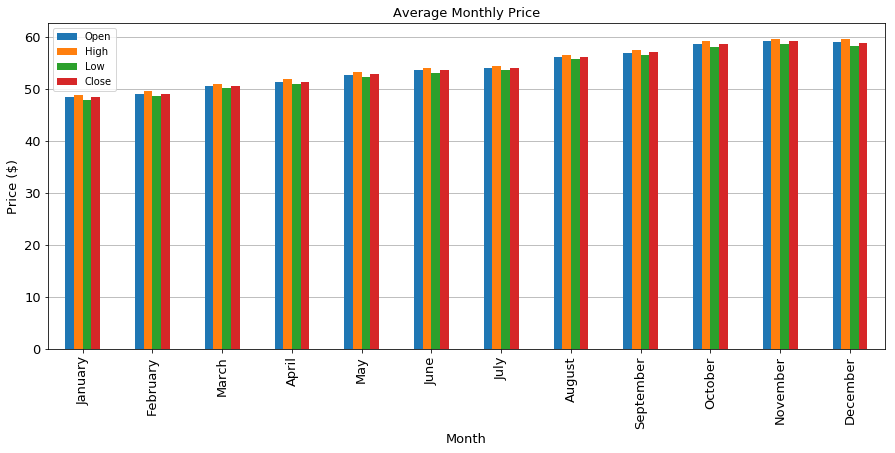

In [125]:
# Plot bar chart of monthly average 2012-2018
p = dfMSFT_month.plot(kind="bar",figsize=(15, 6), fontsize=13, zorder=3)

# Add labels and titles
p.set_title("Average Monthly Price", fontsize=13)
p.set_xlabel("Month", fontsize=13)
p.set_xticklabels(Month_List)
p.set_ylabel("Price ($)", fontsize = 13)

# Add grid lines behind bars using zorder
p.grid(axis="y", zorder=0,)

In [142]:
# Print monthly average
dfMSFT_month

,Open,High,Low,Close
DateTime,,,,
1,48.398438,48.806875,47.933360,48.375937
2,49.083651,49.520952,48.567143,49.052698
3,50.546294,51.003846,50.102028,50.558811
4,51.378605,51.867907,50.883256,51.396589
5,52.740213,53.176950,52.374255,52.846738
6,53.563237,53.977626,53.111439,53.554101
7,54.030360,54.475899,53.583957,54.064029
8,56.087319,56.489348,55.706014,56.144493
9,56.962985,57.402761,56.556940,57.024552


With the MSFT monthly rolling average, I feel that it really emphasises the rises and falls that the stock saw throughout this time frame. With the graph somewhat smoothed, the curves become clearer and we can see that MSFT seems to be far more volatile than ATVI, especially in 2015.

The monthly average bar chart shows us that, like ATVI, January and February are on average the worst two months of the year for MSFT. The tail end of the year is usually the strongest, with October, November, and December seeing the best prices.

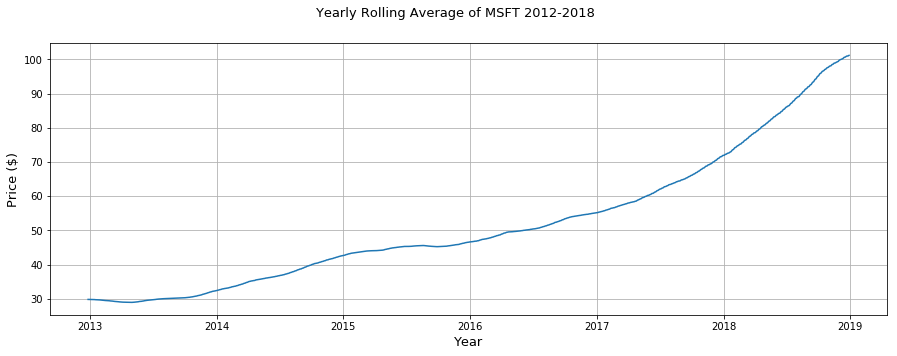

In [130]:
# Get yearly rolling average
MSFT_rm2 = dfMSFT["Close"].rolling(MSFT_Years).mean()

# Create figure
f = plt.figure(figsize=(15,5))

# Plot monthly rolling average
plt.plot(MSFT_rm2)

# Add labels and titles
f.suptitle("Yearly Rolling Average of MSFT 2012-2018", fontsize=13)
plt.xlabel("Year", fontsize=13)
plt.ylabel("Price ($)", fontsize=13)

# Add grid lines
plt.grid()

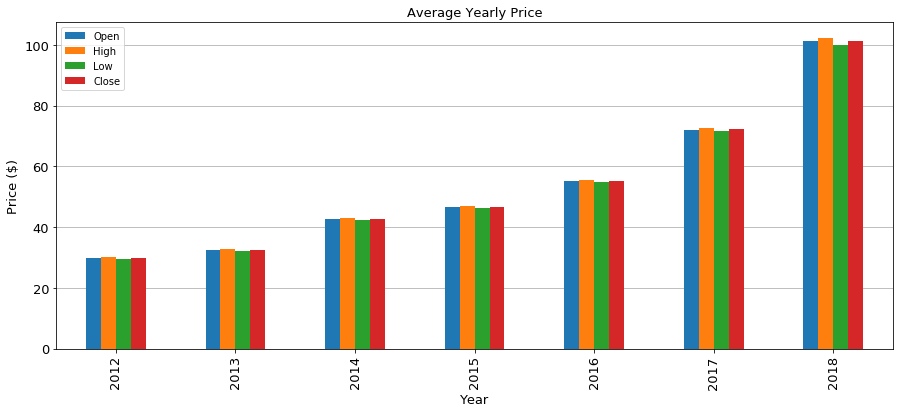

In [128]:
# Plot bar chart for yearly average 2012-2018
p = dfMSFT_year.plot(kind="bar",figsize=(15, 6), fontsize=13, zorder=3)

# Add labels and titles
p.set_title("Average Yearly Price", fontsize=13)
p.set_xlabel("Year", fontsize=13)
p.set_ylabel("Price ($)", fontsize = 13)

# Add grid lines behind bars using zorder
p.grid(axis="y", zorder=0,)

In [143]:
# Print yearly average
dfMSFT_year

,Open,High,Low,Close
DateTime,,,,
2012,29.823077,30.050983,29.564060,29.814530
2013,32.449651,32.730306,32.194978,32.481048
2014,42.540509,42.872203,42.188305,42.555339
2015,46.583151,47.069664,46.172773,46.640672
2016,55.153965,55.604310,54.710215,55.185560
2017,72.083701,72.510705,71.629383,72.110661
2018,101.251803,102.252060,100.024335,101.135537


The rolling yearly average shows just how great the increase was from 2012 to 2018, with the average price increasing nearly three times. This is reiterated in the bar chart where we can see how big the jump is, even from 2017 to 2018. But, just as in the ATVI yearly visualisations, these graphs do not show the the severe decrease at the end of 2018.

### Netflix

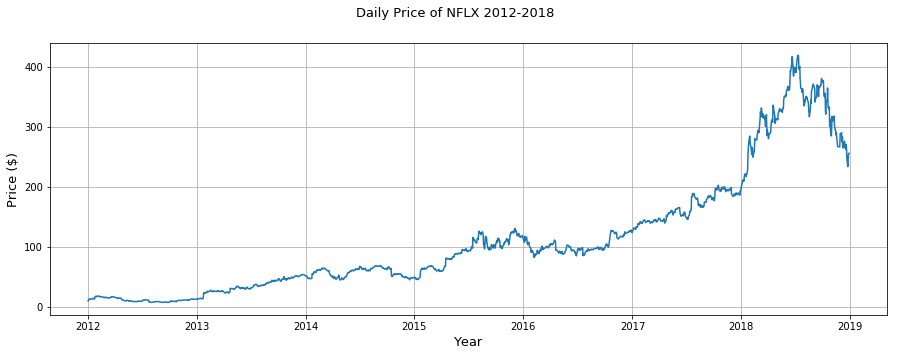

In [129]:
# Create figure
f = plt.figure(figsize=(15,5))

# Plot daily data
plt.plot(dfNFLX["Close"])

# Add labels and titles
f.suptitle("Daily Price of NFLX 2012-2018", fontsize=13)
plt.xlabel("Year", fontsize=13)
plt.ylabel("Price ($)", fontsize=13)

# Add grid lines
plt.grid()

In [144]:
# Print head of NFLX DataFrame
dfNFLX.head(5)

,Open,High,Low,Close
DateTime,,,,
2012-01-03,10.040000,10.388572,10.018572,10.320000
2012-01-04,10.335714,11.567142,10.258572,11.492857
2012-01-05,11.345715,11.694285,11.040000,11.328571
2012-01-06,11.302857,12.471429,11.242857,12.327143
2012-01-09,12.801429,14.235714,12.448571,14.025714


In [145]:
# Print tail of NFLX DataFrame
dfNFLX.tail(5)

,Open,High,Low,Close
DateTime,,,,
2018-12-21,263.829987,264.500000,241.289993,246.389999
2018-12-24,242.000000,250.649994,233.679993,233.880005
2018-12-26,233.919998,254.500000,231.229996,253.669998
2018-12-27,250.110001,255.589996,240.100006,255.570007
2018-12-28,257.940002,261.910004,249.800003,256.079987


Just as seen in both the ATVI and MSFT daily price graphs, NFLX has increased year-on-year from 2012 to 2018. Yet again we see a decrease from mid 2018 onwards, with the price almost halved from above 400USD  to around the 250USD  mark. NFLX has seen the biggest increase, with the price around the 10USD mark at the beginning of 2012, to around 410USD  by mid 2018. This was reduced to around the 250USD  mark by year end 2018. Stock growth of NFLX hasn't been as consistent as the others, as we can see in the years 2014 and 2016 therwe was very little growth at all.

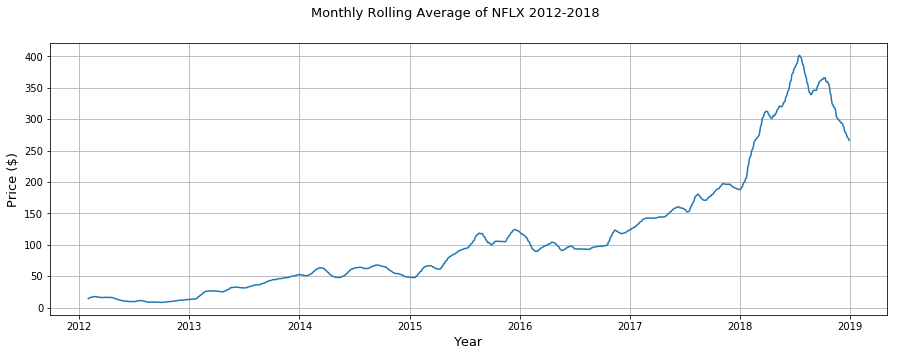

In [131]:
# Get monthly rolling mean
NFLX_rm1 = dfNFLX["Close"].rolling(NFLX_Months).mean()

# Create figure
f = plt.figure(figsize=(15,5))

# Plot monthly rolling average
plt.plot(NFLX_rm1)

# Add labels and titles
f.suptitle("Monthly Rolling Average of NFLX 2012-2018", fontsize=13)
plt.xlabel("Year", fontsize=13)
plt.ylabel("Price ($)", fontsize=13)

# Add grid lines
plt.grid()

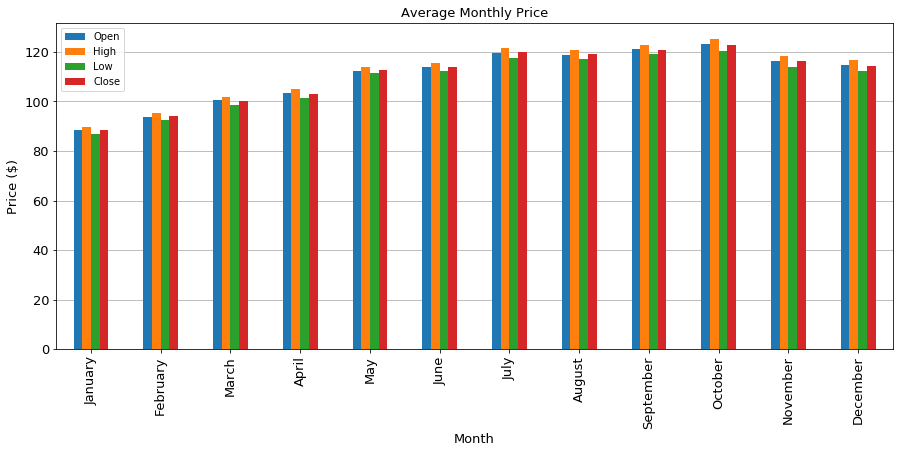

In [132]:
# Plot bar chart of monthly average 2012-2018
p = dfNFLX_month.plot(kind="bar",figsize=(15, 6), fontsize=13, zorder=3)

# Add labels and titles
p.set_title("Average Monthly Price", fontsize=13)
p.set_xlabel("Month", fontsize=13)
p.set_xticklabels(Month_List)
p.set_ylabel("Price ($)", fontsize = 13)

# Add grid lines behind bars using zorder
p.grid(axis="y", zorder=0,)

In [146]:
# Print monthly average
dfNFLX_month

,Open,High,Low,Close
DateTime,,,,
1,88.293250,89.861069,86.694133,88.527339
2,93.837009,95.507053,92.312310,94.006339
3,100.519129,101.794276,98.645258,100.254225
4,103.491055,104.866386,101.438678,103.074531
5,112.447282,113.871375,111.346971,112.883308
6,113.890730,115.312565,112.100041,113.742722
7,119.516732,121.392240,117.663648,119.796680
8,118.906540,120.870116,117.280875,119.183148
9,121.070897,122.833123,119.089601,120.961118


The monthly rolling average gives us a better look at how sharp the decline was towards the back end of 2018. From the bar chart we can also see again that January and February are, on average, the two worst months for NFLX. September and October see the highest prices throughout the year.

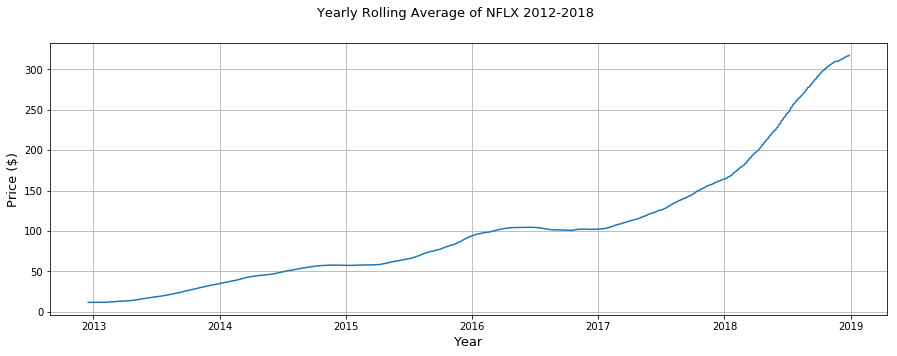

In [148]:
# Get yearly rolling average
NFLX_rm2 = dfNFLX["Close"].rolling(NFLX_Years).mean()

# Create figure
f = plt.figure(figsize=(15,5))

# Plot monthly rolling average
plt.plot(NFLX_rm2)

# Add labels and titles
f.suptitle("Yearly Rolling Average of NFLX 2012-2018", fontsize=13)
plt.xlabel("Year", fontsize=13)
plt.ylabel("Price ($)", fontsize=13)

# Add grid lines
plt.grid()

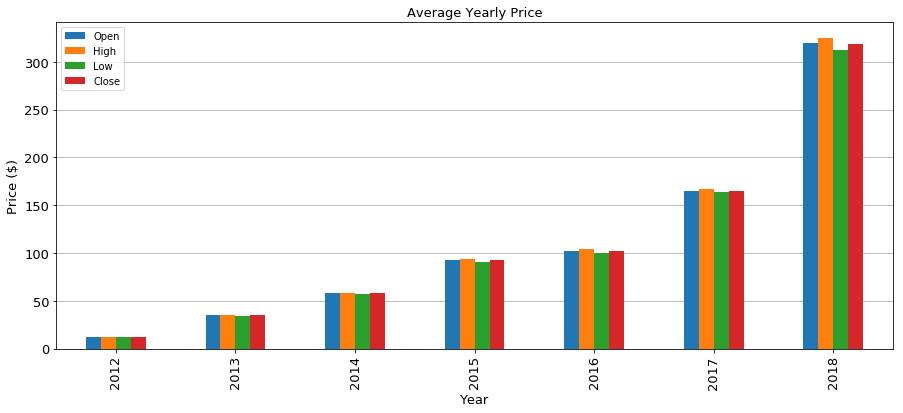

In [149]:
# Plot bar chart for yearly average 2012-2018
p = dfNFLX_year.plot(kind="bar",figsize=(15, 6), fontsize=13, zorder=3)

# Add labels and titles
p.set_title("Average Yearly Price", fontsize=13)
p.set_xlabel("Year", fontsize=13)
p.set_ylabel("Price ($)", fontsize = 13)

# Add grid lines behind bars using zorder
p.grid(axis="y", zorder=0,)

In [147]:
# Print yearly average
dfNFLX_year

,Open,High,Low,Close
DateTime,,,,
2012,11.823542,12.119417,11.570738,11.852077
2013,34.900680,35.513624,34.273748,34.906512
2014,57.635127,58.385492,56.760767,57.588448
2015,92.273649,93.905946,90.646268,92.343238
2016,102.049207,103.625991,100.446344,102.091278
2017,165.172889,166.830889,163.278489,165.161733
2018,319.364562,324.933947,312.763288,319.018290


The rolling yearly average and yearly average bar chart again show how incredible NFLX price rise was. We see how the average yearly price more than doubled between 2017 and 2018 alone. But it also shows how little growth there was between 2015 and 2016. This amazing growth is once again overshadowed though, with the just as amazing price drop not being indicated at all in either graph. NFLX yearly increase was so large in 2018, that the line graph looks like it is increasing even at the end of 2018.